# **1. Data Preparation**

###**1.1 Data Cleaning**

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import re

In [3]:
# Load datasets
fake_news = pd.read_csv('/content/Fake.csv', encoding='latin1', delimiter='\t', quotechar='"', header=None)
true_news = pd.read_csv('/content/True.csv', encoding='latin1', delimiter='\t', on_bad_lines='skip', quotechar='"', header=None)

In [4]:
# Add a 'label' column to each dataset
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for true news

In [5]:
# Assign column names manually
fake_news.columns = ['text', 'label']
true_news.columns = ['text', 'label']

In [6]:
# Combine datasets
news_data = pd.concat([fake_news, true_news], ignore_index=True)

# Shuffle the data
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display combined data info
print("\nCombined DataFrame Info:")
print(news_data.info())


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4920 non-null   object
 1   label   4920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.0+ KB
None


###**1.2 Remove Missing Data**

In [119]:
# Check for missing values
missing_values = news_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Drop rows with missing values
news_data = news_data.dropna().reset_index(drop=True)


Missing Values in Each Column:
text              0
label             0
text_length       0
tokens            0
processed_text    0
dtype: int64


###**1.3 Handle Duplicates**

In [8]:
# Check for duplicates values
duplicate_rows = news_data[news_data.duplicated(subset=['text'])]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Drop rows with duplicates values
news_data.drop_duplicates(subset=['text'], inplace=True)
print("\nAfter Removing Duplicates:")
print(news_data.info())


Duplicate Rows:
                                                   text  label
767   Trump asks Supreme Court to block travel ban r...      1
1146  Trump urges NFL to ban players kneeling during...      1
1395  Under pressure from Trump, Price resigns as he...      1
2525  Trump taps Fed centrist Powell to lead U.S. ce...      1
2547  Trump Jr. emails suggest he welcomed Russian h...      1
2735  Turkey urges U.S. to review visa suspension as...      1
2846  Senate tax bill stalls on deficit-focused 'tri...      1
3639  Pentagon notified U.S. Congress of $593 millio...      1
3647  White House budget chief says any tax package ...      1
3760  Republicans unveil tax cut bill, but the hard ...      1
4012  Trump interviews four for Fed chair job, to de...      1
4112                            title,text,subject,date      1
4333  Trump warns 'rogue regime' North Korea of grav...      1
4483  Two ex-Trump aides charged in Russia probe, th...      1

After Removing Duplicates:
<class 'pa

###**1.4 Remove Non-Textual Content**

In [120]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

news_data['text'] = news_data['text'].apply(clean_text)

###**1.5 Lowercase Conversion**

In [10]:
# Convert the 'text' columns to lowercase
news_data['text'] = news_data['text'].str.lower()
print(news_data['text'])

0       watch viral video of tomi lahren being called ...
1       trump to senate republicans kill obamacare now...
2       there s something really creepy about melania ...
3       ex u s spy chiefs urge congress to renew inter...
4       trump says hurricane does not look good eyes d...
                              ...                        
4915    senator mccain returning to arizona for cancer...
4916    enough about texas let s talk taxes trump s pr...
4917    former u s president jimmy carter says would t...
4918    russia moscow does not want to escalate situat...
4919    trump now says wall may not need a wall to cov...
Name: text, Length: 4906, dtype: object


# **2. Exploratory Data Analysis (EDA)**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

###**2.1 Analyze Class Distribution**

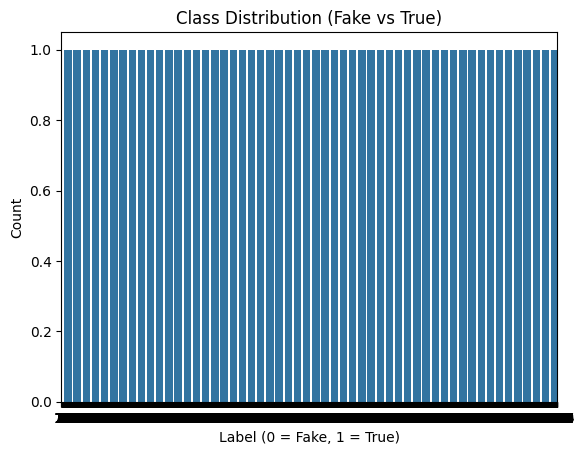

In [12]:
sns.countplot(news_data['label'])
plt.title('Class Distribution (Fake vs True)')
plt.xlabel('Label (0 = Fake, 1 = True)')
plt.ylabel('Count')
plt.show()

###**2.2 Text Length Analysis**

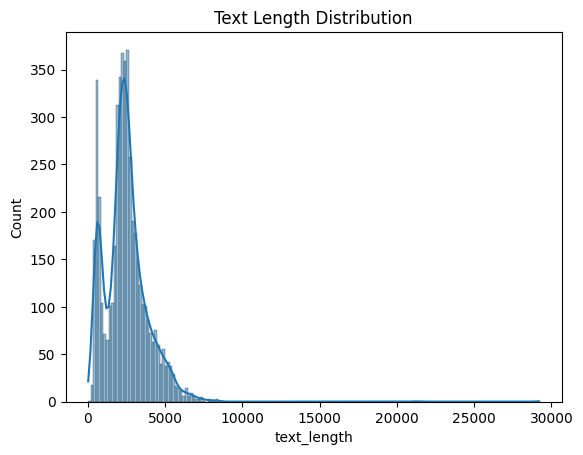

In [121]:
news_data['text_length'] = news_data['text'].apply(len)
sns.histplot(news_data['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

###**2.3 Word Frequency Analysis**

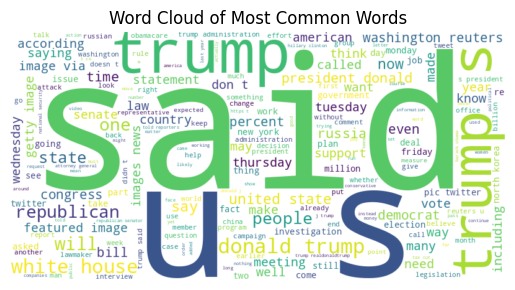

In [15]:
all_words = ' '.join(news_data['text'])
word_freq = Counter(all_words.split()).most_common(20)

# Visualize Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

# **3. Text Preprocessing**

     Prepare text for vectorization and machine learning.

###**3.1 Tokenization**

Split text into individual words or tokens.

In [17]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

news_data['tokens'] = news_data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


###**3.2 Stopwords Removal**

Remove common words (e.g., "and", "is", "the") using predefined stopword lists.


In [18]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
news_data['tokens'] = news_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


###**3.3 Lemmatization**

Reduce words to their base forms to normalize text (e.g., "running" → "run").


In [19]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
news_data['tokens'] = news_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


###**3.4 Rejoin Tokens into Processed Text**

Combine tokens back into processed text for model input.

In [20]:
news_data['processed_text'] = news_data['tokens'].apply(lambda x: ' '.join(x))

In [21]:
#Inspect processed text
print(news_data['processed_text'].head())

0    watch viral video tomi lahren called racist pi...
1    trump senate republican kill obamacare replace...
2    something really creepy melania trump signatur...
3    ex u spy chief urge congress renew internet su...
4    trump say hurricane look good eye debt ceiling...
Name: processed_text, dtype: object


# **4. Feature Extraction**
        
    Feature extraction is about converting the preprocessed text into numerical representations that a machine learning model can process.

###**4.1 Vectorization**

**TF-IDF Vectorizer:**

Assigns weights to words based on their frequency and importance.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(news_data['processed_text']).toarray()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

# Train a classifier using TF-IDF features
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9745417515274949
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       389
           1       0.99      0.97      0.98       593

    accuracy                           0.97       982
   macro avg       0.97      0.98      0.97       982
weighted avg       0.97      0.97      0.97       982



###**4.2 Feature-Label Split**

Separate the features and the target variable:

In [53]:
# Features (X) and target (y)
X = news_data['processed_text']
y = news_data['label']  # Target labels (0 = Fake, 1 = True)

###**4.3 Train-Test Split**

Split the data into training and testing sets:

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **5. Model Building**

###**5.1 Classification Models**

In [40]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**a) Logistic Regression :**

- Train and evaluate the Logistic Regression model.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_vec)

# Calculate Metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Evaluate
print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy}")
print(f"F1-Score: {lr_f1}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       593

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



**b) Naive Bayes:**

- Train and evaluate the Naive Bayes model.

In [89]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test_vec)

# Calculate Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Evaluate
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.9775967413441955
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       389
           1       0.99      0.97      0.98       593

    accuracy                           0.98       982
   macro avg       0.97      0.98      0.98       982
weighted avg       0.98      0.98      0.98       982



**c) Support Vector Machine (SVM):**

- Train and evaluate the SVM model.


In [90]:
from sklearn.svm import LinearSVC

# Train SVM classifier
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_vec, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_vec)

# Calculate Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Evaluate
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))



SVM Results:
Accuracy: 0.9989816700610998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       593

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



**d) XGBoost:**

- Train and evaluate the XGBoost model.

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Matrix
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Evaluation
print("\nXGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.9989816700610998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       593

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982


Confusion Matrix:
[[389   0]
 [  1 592]]


**e) Decision Tree:**

In [101]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vec, y_train)  # Fit model on training data

# Predict on test set
y_pred_dt = dt_model.predict(X_test_vec)

# Calculate Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)  # Accuracy of the model
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')  # F1-score for the model

# Evaluate
print("\nDecision Tree Results:")
print(f"Accuracy: {dt_accuracy}")
print(f"F1-Score: {dt_f1}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       593

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



**f) Random Forest:**

In [102]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)  # Fit model on training data

# Predict on test set
y_pred_rf = rf_model.predict(X_test_vec)

# Calculate Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)  # Accuracy of the model
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')  # F1-score for the model

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"F1-Score: {rf_f1}")
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       593

    accuracy                           1.00       982
   macro avg       1.00      1.00      1.00       982
weighted avg       1.00      1.00      1.00       982



**g) LightGBM (LGBM):**

In [107]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Convert features to float32 to avoid type errors
X_train_vec = X_train_vec.astype('float32')
X_test_vec = X_test_vec.astype('float32')

# Train LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100)
lgb_model.fit(X_train_vec, y_train)  # Fit model on training data

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_vec)

# Calculate Metrics
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)  # Accuracy of the model
lgb_f1 = f1_score(y_test, y_pred_lgb, average='weighted')  # F1-score for the model

# Evaluate
print("\nLightGBM Results:")
print(f"Accuracy: {lgb_accuracy}")
print(f"F1-Score: {lgb_f1}")
print(classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2316, number of negative: 1608
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.416507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20552
[LightGBM] [Info] Number of data points in the train set: 3924, number of used features: 4498
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.590214 -> initscore=0.364850
[LightGBM] [Info] Start training from score 0.364850
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


###**5.2 Evaluate Model Performance**

**a) Logistic Regression:**

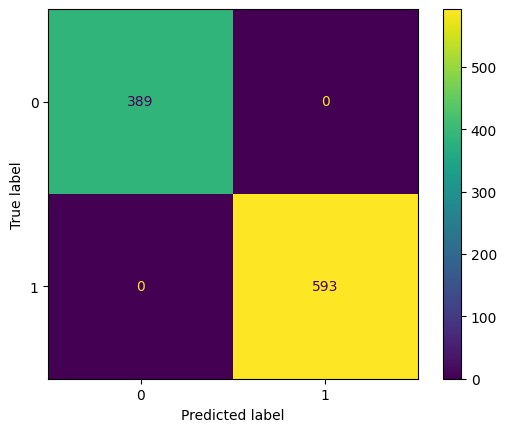

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

**b) Naive Bayes:**

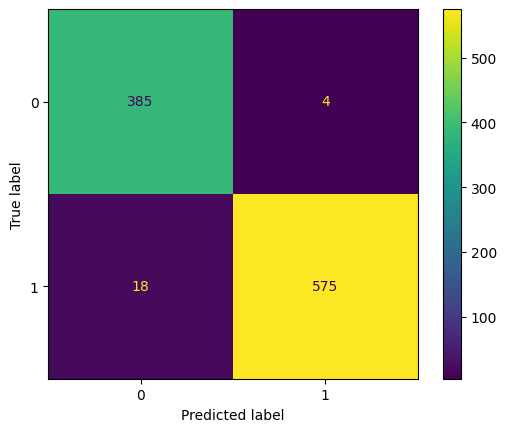

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

**c) Support Vector Machine (SVM):**

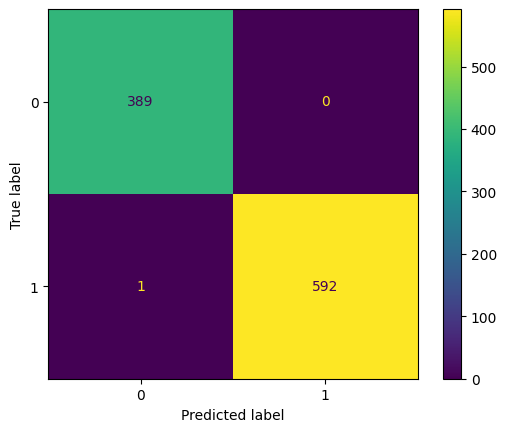

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()

**d) XGBoost:**

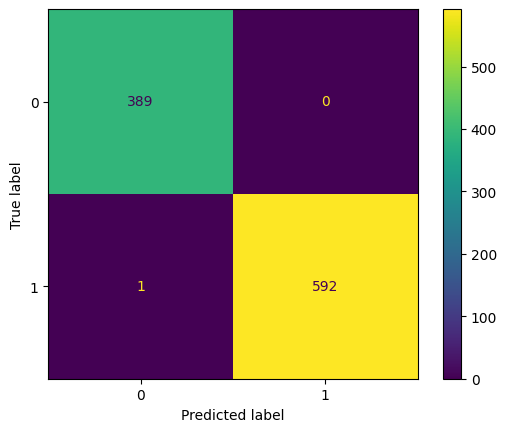

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.show()

**e) Decision Tree:**

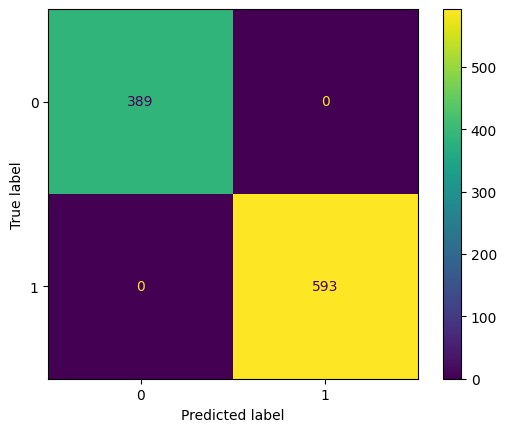

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

**f) Random Forest:**

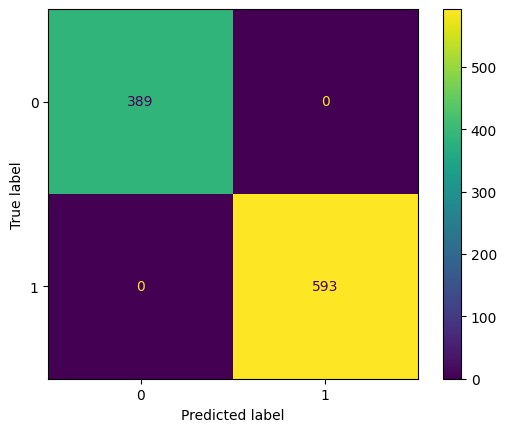

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

**g) LightGBM (LGBM):**

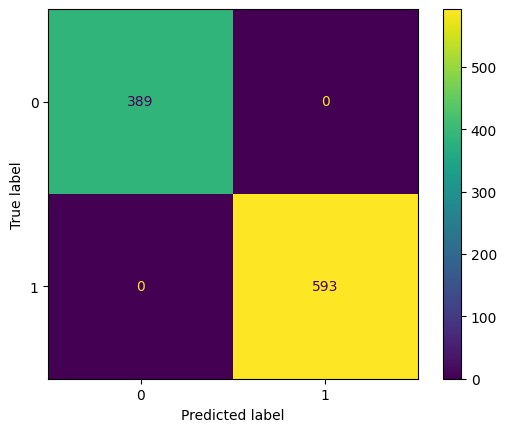

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb)
plt.show()

###**5.3 Summary of Results**

In [122]:
# Summary of results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'XGBoost', 'Decision Tree', 'Random Forest', 'LightGBM'],
    'Accuracy': [logreg_accuracy, nb_accuracy, svm_accuracy, xgb_accuracy, dt_accuracy, rf_accuracy, lgb_accuracy],
    'F1-Score': [lr_f1, nb_f1, svm_f1, xgb_f1, dt_f1, rf_f1, lgb_f1]
})

print("\nModel Performance Comparison:")
print(results)



Model Performance Comparison:
                 Model  Accuracy  F1-Score
0  Logistic Regression  0.603870  1.000000
1          Naive Bayes  0.977597  0.977661
2                  SVM  0.998982  0.998982
3              XGBoost  0.998982  0.998982
4        Decision Tree  1.000000  1.000000
5        Random Forest  1.000000  1.000000
6             LightGBM  1.000000  1.000000
